In [18]:
import numpy as np
import matplotlib.pyplot as plt

from habitat_sim.utils.data import ImageExtractor


# For viewing the extractor output
def display_sample(sample):
    img = sample["rgba"]
    depth = sample["depth"]
    semantic = sample["semantic"]

    arr = [img, depth, semantic]
    titles = ["rgba", "depth", "semantic"]
    plt.figure(figsize=(12, 8))
    for i, data in enumerate(arr):
        ax = plt.subplot(1, 3, i + 1)
        ax.axis("off")
        ax.set_title(titles[i])
        plt.imshow(data)

    plt.show()


scene_filepath = "/datasets/home/memmel/PointNav-VO/dataset/Gibson/gibson/Angiola.gl.glb"

extractor = ImageExtractor(
    scene_filepath,
    img_size=(192, 341),
    output=["rgba", "depth", "semantic"],
)



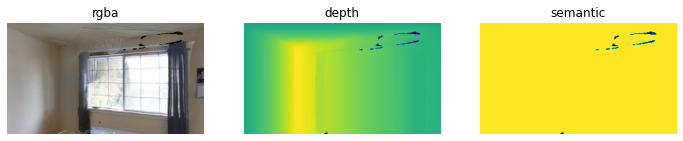

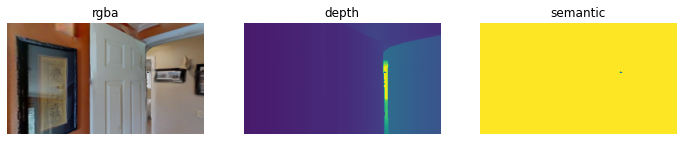

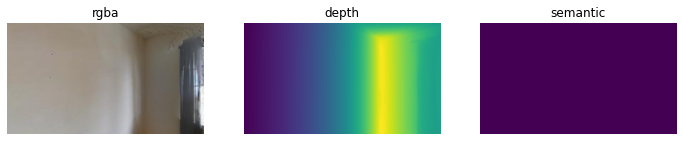

In [19]:
# Use the list of train outputs instead of the default, which is the full list
# of outputs (test + train)
extractor.set_mode('train')

# Index in to the extractor like a normal python list
sample = extractor[0]

# Or use slicing
samples = extractor[1:4]
for sample in samples:
    display_sample(sample)

# Close the extractor so we can instantiate another one later
# (see close method for detailed explanation)
extractor.close()

In [9]:
from PIL import Image
image = Image.open('surface_normal.png')


In [11]:
new_image = image.resize((341, 192))
new_image.save('surface_normal_resize.png')

In [1]:
import joblib

In [3]:
!ls /datasets/home/memmel/PointNav-VO/train_log/final/vit/unique/vo_vit_b_mmae_act_rgbd_challenge/infos

eval_all_invariance_info.p
eval_all_unified_cur_rel_to_prev_regression_info.p
eval_all_unified_prev_rel_to_cur_regression_info.p
eval_forward_unified_regression_info.p
eval_left_unified_regression_info.p
eval_objective_info.p
eval_right_unified_regression_info.p
train_invariance_info.p
train_objective_info.p
train_unified_cur_rel_to_prev_regression_info.p
train_unified_prev_rel_to_cur_regression_info.p


In [ ]:
models = [
    "vo_vit_b_mmae_act_rgbd_challenge",
    "vo_vit_b_mmae_act_rgbd_challenge_inv",
    "vo_vit_b_mmae_act_rgb",
    "vo_vit_b_mmae_act_d",
    "vo_vit_b_mmae_act_rgbd",
    "vo_vit_b_mmae_rgb",
    "vo_vit_b_mmae_d",
    "vo_vit_b_mmae_rgbd"
    ]

In [ ]:
import numpy as np
import joblib
for model in models:
    loaded = joblib.load(f'/datasets/home/memmel/PointNav-VO/train_log/final/vit/unique/{model}/infos/eval_objective_info.p')
    min_val = np.inf
    min_key = None
    for (key, val) in loaded["eval_all_objective"]:
        if val < min_val:
            min_val = val
            min_key = key
    print(model, min_key, min_val)